In [1]:
import pandas as pd
import numpy as np

#### (a) 데이터를 feature와 label로 나누시오.

In [2]:
import os
imdb_dir='C:\\Users\\Kim\\Downloads\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='UTF8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

#### (b) 데이터에 대하여 토큰화를 실행하시오.

In [3]:
# Tokenizing the text of the raw IMDB data
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 100

max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


#### (c) train data는 20000개, validation data는 5000개로 분리하시오.

In [4]:
training_samples = 20000
validation_samples = 5000
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

#### (d) 딥러닝 모델을 정의할 때 모델의 하이퍼 파라미터는 모델의 성능에 영향을 준다. 따라서, 좋은 성능의 모델을 찾기 위해선 은닉층의 개수, 층마다 있는 뉴런의 개수, 각 층에서 사용하는 활성화 함수, 가중치 초기화, 에포트, 배치 사이즈 등 다양한 하이퍼 파라미터에 변화를 주며 최적의 조합을 찾아내야 한다. Keras를 이용하여 모델을 정의하도록 하며, 위에서 언급한 하이퍼 파라미터의 설정에 변화를 주어 각각 다른 5개의 모델을 정의하시오. (모델에 대한 코드를 반드시 첨부할 것.)

In [6]:
# model 1
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model1 = Sequential()
model1.add(Embedding(max_words, 100, input_length=maxlen))
model1.add(Flatten())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model1.fit(x_train, y_train, epochs=2, batch_size=32, 
                     validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
625/625 [==============================] - 7s 11ms/step - loss: 0.4497 - acc: 0.7782 - val_loss: 0.3408 - val_acc: 0.8514
Epoch 2/2
625/625 [=========================

In [ ]:
# model 2
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model2 = Sequential()
model2.add(Embedding(max_words, 100, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(x_train, y_train, epochs=10, batch_size=64, 
                      validation_data=(x_val, y_val))

In [ ]:
# model 3
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model3 = Sequential()
model3.add(Embedding(max_words, 100, input_length=maxlen))
model3.add(Flatten())
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history3 = model3.fit(x_train, y_train, epochs=10, batch_size=64, 
                      validation_data=(x_val, y_val))

In [ ]:
# model 4
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model4 = Sequential()
model4.add(Embedding(max_words, 100, input_length=maxlen))
model4.add(Flatten())
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history4 = model4.fit(x_train, y_train, epochs=10, batch_size=32, 
                      validation_data=(x_val, y_val))

In [ ]:
# model 5
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model5 = Sequential()
model5.add(Embedding(max_words, 100, input_length=maxlen))
model5.add(Flatten())
model5.add(Dense(32, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
model5.summary()
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history4 = model4.fit(x_train, y_train, epochs=3, batch_size=128, 
                      validation_data=(x_val, y_val))

#### (e) (d)의 결과에 대하여 모델별로 confution matrix를 구하시오. 어떤 모델의 성능이 가장 좋은가?

> confusion matrix에서 accuracy가 0.84132로 가장 높은 model4의 성능이 가장 좋다.

In [7]:
# Tokenizing the data of the test set
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# model 1
y_pred = model1.predict(x_test)
y_pred_classes = np.round(y_pred).flatten()
y_true_classes = y_test.flatten()

mymtx = confusion_matrix(y_true_classes, y_pred_classes)
print(mymtx)

782/782 [==============================] - 2s 2ms/step
[[10351  2149]
 [ 1993 10507]]


In [10]:
loss, acc = model1.evaluate(x_test, y_test)
acc

782/782 [==============================] - 3s 3ms/step - loss: 0.4064 - acc: 0.8343


0.8343200087547302

In [60]:
(10312+10431)/(10312+2188+2069+10431)

0.82972

In [52]:
# model 2
y_pred = model2.predict(x_test)
y_pred_classes = np.round(y_pred).flatten()
y_true_classes = y_test.flatten()

mymtx = confusion_matrix(y_true_classes, y_pred_classes)
print(mymtx)

782/782 [==============================] - 2s 2ms/step
[[10427  2073]
 [ 2032 10468]]


In [61]:
(10427+10468)/(10427+2073+2032+10468)

0.8358

In [53]:
# model 3
y_pred = model3.predict(x_test)
y_pred_classes = np.round(y_pred).flatten()
y_true_classes = y_test.flatten()

mymtx = confusion_matrix(y_true_classes, y_pred_classes)
print(mymtx)

782/782 [==============================] - 2s 2ms/step
[[10381  2119]
 [ 1960 10540]]


In [62]:
(10381+10540)/(10381+2119+1960+10540)

0.83684

In [50]:
# model 4
y_pred = model4.predict(x_test)
y_pred_classes = np.round(y_pred).flatten()
y_true_classes = y_test.flatten()

mymtx = confusion_matrix(y_true_classes, y_pred_classes)
print(mymtx)

782/782 [==============================] - 2s 2ms/step
[[10467  2033]
 [ 1934 10566]]


In [63]:
(10467+10566)/(10467+2033+1934+10566)

0.84132

In [55]:
# model 5
y_pred = model5.predict(x_test)
y_pred_classes = np.round(y_pred).flatten()
y_true_classes = y_test.flatten()

mymtx = confusion_matrix(y_true_classes, y_pred_classes)
print(mymtx)

782/782 [==============================] - 2s 2ms/step
[[6053 6447]
 [5960 6540]]


In [64]:
(6053+6540)/(6053+6447+5960+6540)

0.50372

#### (f) (d)에서 정의한 모델 중 하나를 선택하여 callback option을 설정하여 학습을 진행할 것이다. epoch=100, batch_size=32으로 설정한 후, Call back option을 사용하여 model의 accuracy가 20번 동안 좋아지지 않으면 학습을 멈추도록 설정하시오. 또한, training history를 시각화하여 plot을 첨부하시오.

In [74]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_acc', patience=20)

# 모델 학습
history = model4.fit(x_train, y_train, epochs=100, batch_size=32, 
                     validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
625/625 [==============================] - 7s 11ms/step - loss: 2.8241e-09 - acc: 1.0000 - val_loss: 1.3492 - val_acc: 0.8476
Epoch 2/100
625/625 [==============================] - 8s 12ms/step - loss: 2.7511e-09 - acc: 1.0000 - val_loss: 1.3500 - val_acc: 0.8476
Epoch 3/100
625/625 [==============================] - 7s 12ms/step - loss: 2.8010e-09 - acc: 1.0000 - val_loss: 1.3507 - val_acc: 0.8476
Epoch 4/100
625/625 [==============================] - 7s 11ms/step - loss: 2.8261e-09 - acc: 1.0000 - val_loss: 1.3517 - val_acc: 0.8476
Epoch 5/100
625/625 [==============================] - 7s 11ms/step - loss: 2.8298e-09 - acc: 1.0000 - val_loss: 1.3508 - val_acc: 0.8468
Epoch 6/100
625/625 [==============================] - 7s 12ms/step - loss: 2.8276e-09 - acc: 1.0000 - val_loss: 1.3522 - val_acc: 0.8474
Epoch 7/100
625/625 [==============================] - 8s 12ms/step - loss: 2.8192e-09 - acc: 1.0000 - val_loss: 1.3524 - val_acc: 0.8472
Epoch 8/100
625/625 [=============

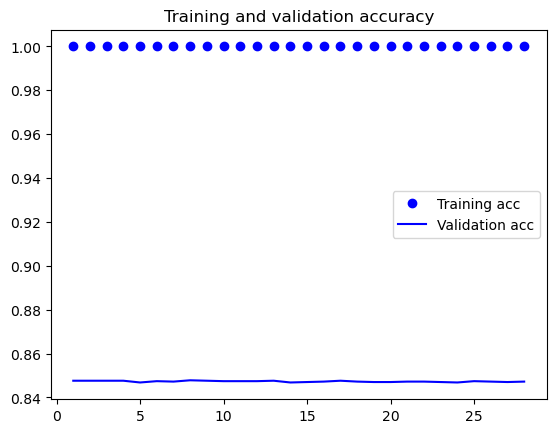

In [75]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()